### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [2]:
# Unión de todos los datos en un sólo DataFrame

tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
df.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


#1. Análisis de facturación



In [3]:
ingresos = df.groupby("Tienda")["Precio"].sum().sort_values(ascending=False)
print(ingresos)

Tienda
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: Precio, dtype: float64


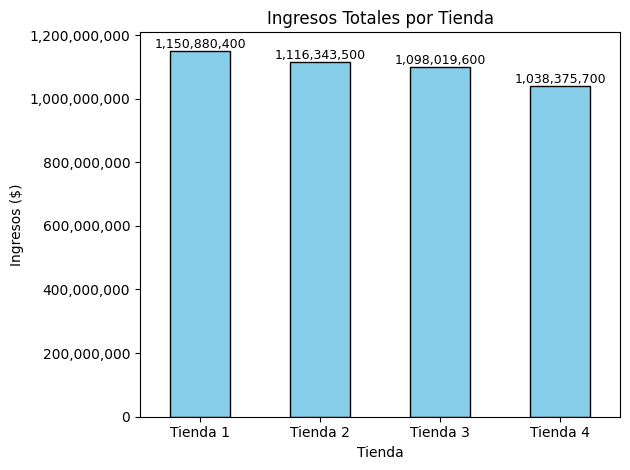

In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Graficar
ax = ingresos.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Ingresos Totales por Tienda")
plt.ylabel("Ingresos ($)")
plt.xticks(rotation=0)

# Evitar notación científica
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Agregar etiquetas encima de cada barra
for i, valor in enumerate(ingresos):
    ax.text(i, valor, f'{valor:,.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

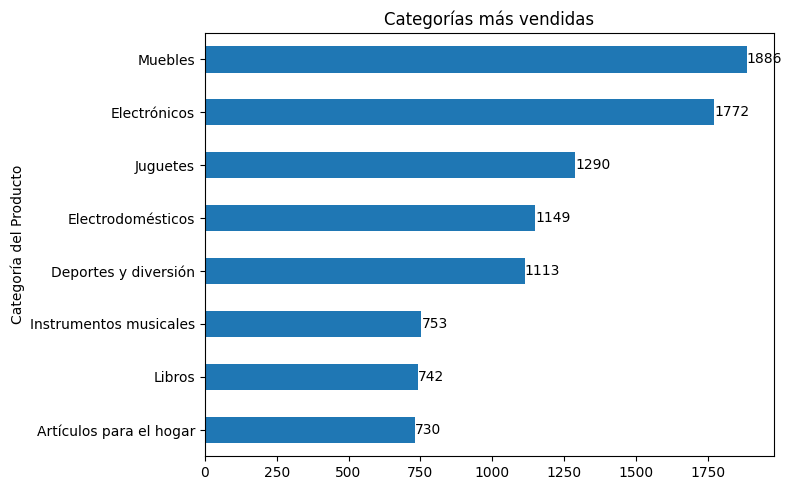

In [5]:
categorias = df["Categoría del Producto"].value_counts().head(10)

ax = categorias.plot(kind="barh", title="Categorías más vendidas", figsize=(8,5))
for i, valor in enumerate(categorias):
    ax.text(valor + 1, i, str(valor), va='center', fontsize=10)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [6]:
calificaciones = df.groupby("Tienda")["Calificación"].mean().round(2)
print(calificaciones)

Tienda
Tienda 1    3.98
Tienda 2    4.04
Tienda 3    4.05
Tienda 4    4.00
Name: Calificación, dtype: float64


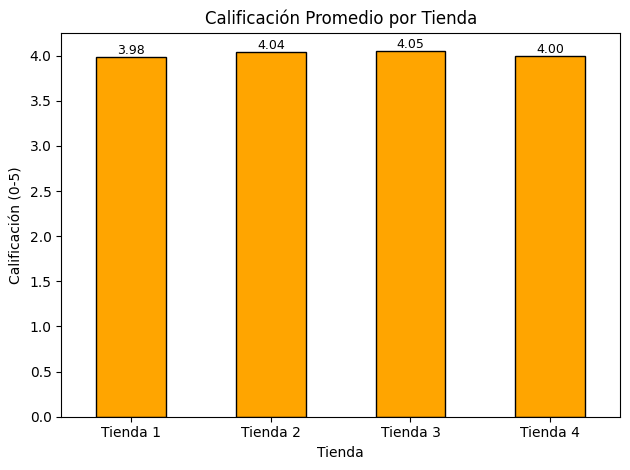

In [7]:
import matplotlib.pyplot as plt

# Graficar
ax = calificaciones.plot(kind="bar", color="orange", edgecolor="black")

plt.title("Calificación Promedio por Tienda")
plt.ylabel("Calificación (0-5)")
plt.xticks(rotation=0)

# Agregar etiquetas encima de cada barra
for i, valor in enumerate(calificaciones):
    ax.text(i, valor, f'{valor:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

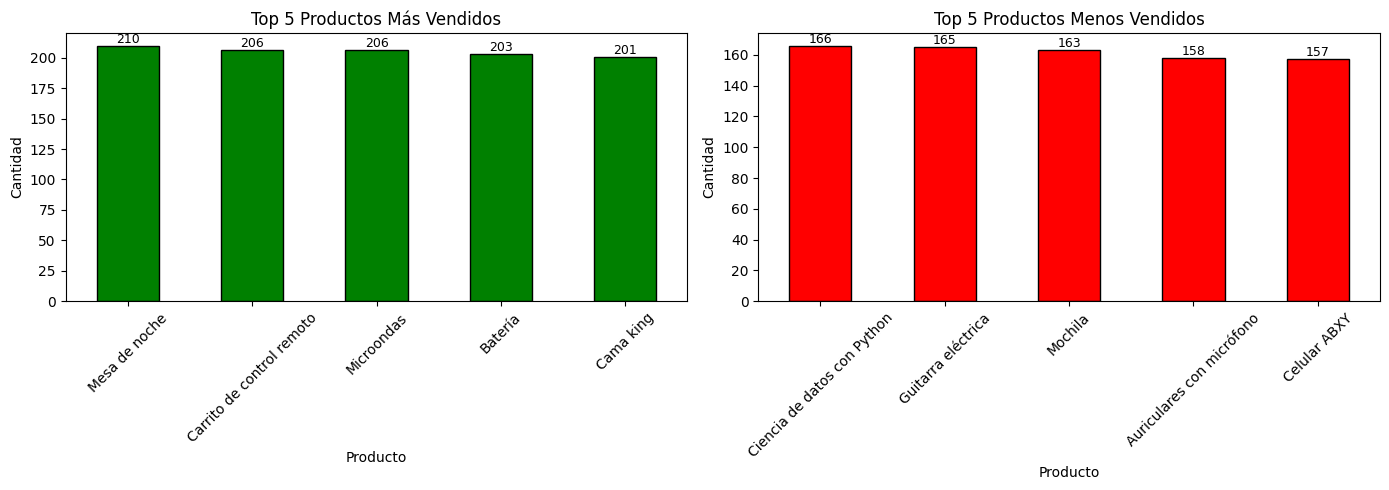

In [8]:
mas_vendidos = df["Producto"].value_counts().head(5)
menos_vendidos = df["Producto"].value_counts().tail(5)

import matplotlib.pyplot as plt

# Crear figura con 2 subplots en 1 fila y 2 columnas
fig, axs = plt.subplots(1, 2, figsize=(14, 5))  # Puedes ajustar el tamaño si deseas

# --- Gráfico 1: Más vendidos ---
ax1 = mas_vendidos.plot(kind="bar", color="green", edgecolor="black", ax=axs[0])

ax1.set_title("Top 5 Productos Más Vendidos")
ax1.set_ylabel("Cantidad")
ax1.set_xticklabels(mas_vendidos.index, rotation=45)

# Etiquetas encima de las barras
for i, valor in enumerate(mas_vendidos):
    ax1.text(i, valor, f'{valor}', ha='center', va='bottom', fontsize=9)

# --- Gráfico 2: Menos vendidos ---
ax2 = menos_vendidos.plot(kind="bar", color="red", edgecolor="black", ax=axs[1])

ax2.set_title("Top 5 Productos Menos Vendidos")
ax2.set_ylabel("Cantidad")
ax2.set_xticklabels(menos_vendidos.index, rotation=45)

# Etiquetas encima de las barras
for i, valor in enumerate(menos_vendidos):
    ax2.text(i, valor, f'{valor}', ha='center', va='bottom', fontsize=9)

# Ajustar espacio entre los subplots
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [9]:
costo_envio = df.groupby("Tienda")["Costo de envío"].mean().round(2)
print(costo_envio)

Tienda
Tienda 1    26018.61
Tienda 2    25216.24
Tienda 3    24805.68
Tienda 4    23459.46
Name: Costo de envío, dtype: float64


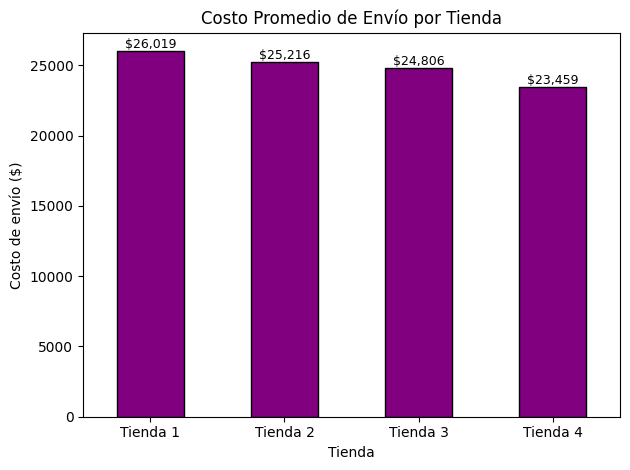

In [10]:
import matplotlib.pyplot as plt

# Graficar
ax = costo_envio.plot(kind="bar", color="purple", edgecolor="black")

plt.title("Costo Promedio de Envío por Tienda")
plt.ylabel("Costo de envío ($)")
plt.xticks(rotation=0)

# Agregar etiquetas encima de cada barra con símbolo de dólar
for i, valor in enumerate(costo_envio):
    ax.text(i, valor, f'${valor:,.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Informe Final – Alura Store

### **Introducción**

El presente análisis tiene como objetivo apoyar al Sr. Juan en la toma de una decisión estratégica: identificar qué tienda de las cuatro que posee Alura Store presenta el menor rendimiento global, con el fin de venderla e invertir los recursos en un nuevo negocio.

Para ello, se evaluaron los ingresos, la distribución de ventas por categoría, la calificación promedio de los clientes, los productos más y menos vendidos, y el costo promedio de envío por tienda.

---

### **Desarrollo**

### 1. Ingreso total por tienda
- Tienda 1: $1,150,880,400

- Tienda 2: $1,116,343,500

- Tienda 3: $1,098,019,600

- Tienda 4: $1,038,375,700

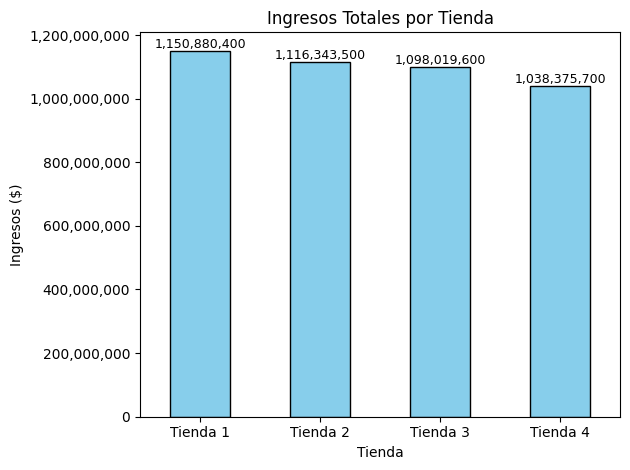

La **Tienda 4** registra el menor ingreso total.



---



### 2. Ventas por categoría (más vendidas globalmente)
1. Muebles – 1.885 ventas
2. Electrónicos – 1.772 ventas
3. Juguetes – 1.290 ventas
4. Electrodomésticos – 1.149 ventas
5. Deportes y diversión – 1.113 ventas
6. Instrumentos musicales – 753 ventas
7. Libros – 742 ventas
8. Artículos para el hogar – 730 ventas

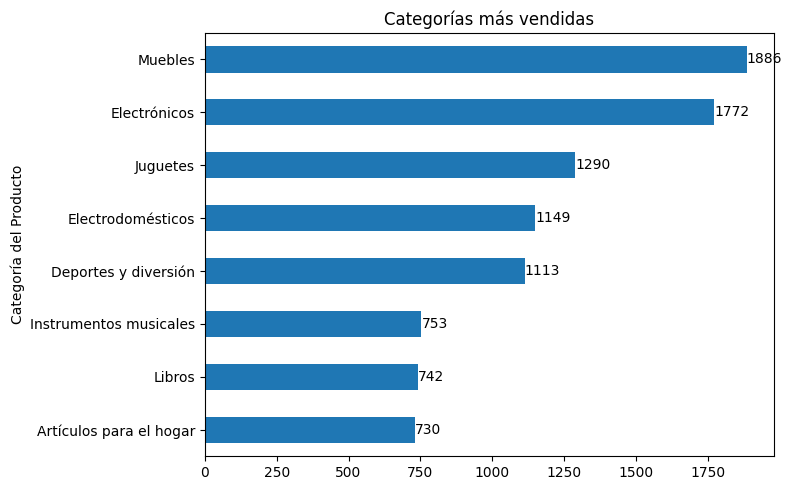

Las categorías de **Muebles** y **Electrónicos** dominan las ventas totales, siendo clave que las tiendas mantengan un buen desempeño en ellas.

---

### 3. Calificación promedio por tienda
- Tienda 1: 3.98
- Tienda 2: 4.04
- Tienda 3: 4.05
- Tienda 4: 4.00

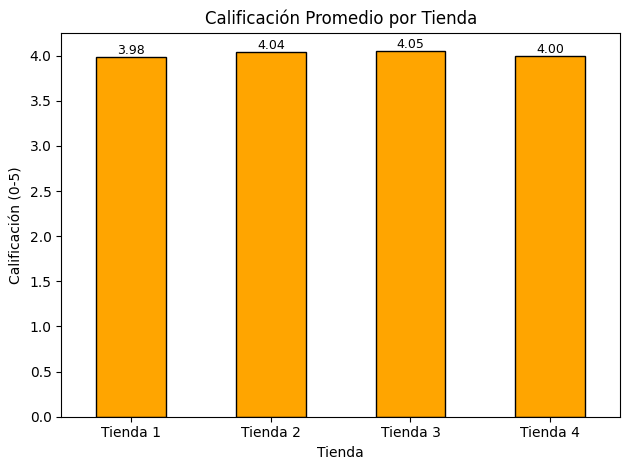

Aunque las diferencias son pequeñas, **Tienda 1** presenta la menor valoración media.

---

### 4. Productos más vendidos
1. Mesa de noche – 210 unidades
2. Carrito de control remoto – 206 unidades
3. Microondas – 206 unidades
4. Microondas – 206 unidades
5. Batería – 203 unidades
6. Cama king – 201 unidades

### 5. Productos menos vendidos
1. Ciencia de datos con Python – 166 unidades
2. Guitarra eléctrica – 165 unidades
3. Mochila – 163 unidades
4. Auriculares con micrófono – 158 unidades
5. Celular ABXY – 157 unidades

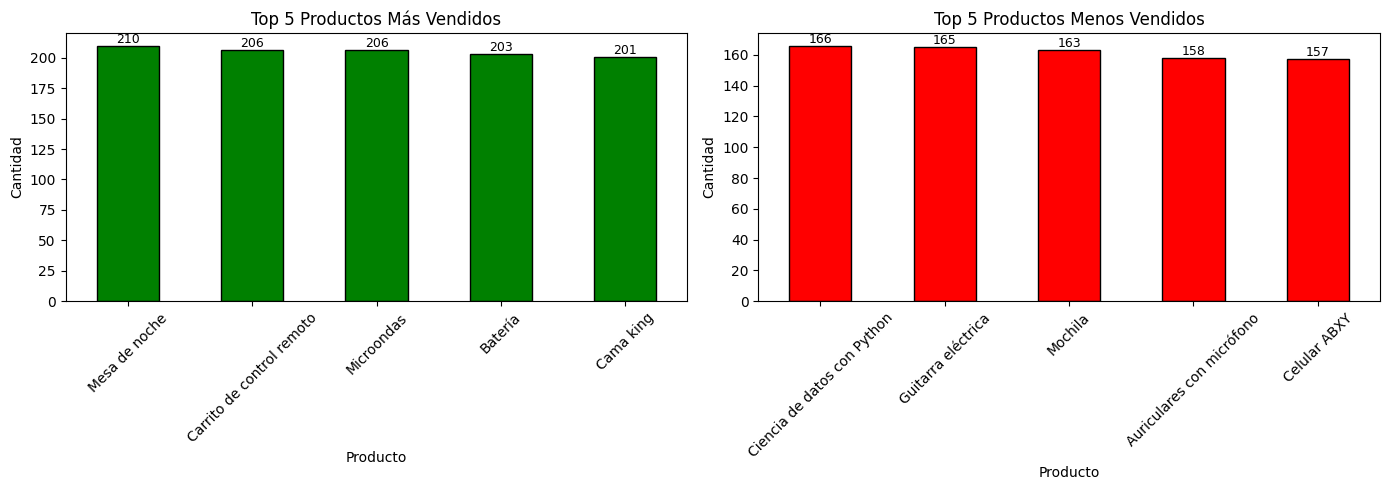

---

### 6. Costo promedio de envío por tienda
- Tienda 1: $26.019

- Tienda 2: $25.216

- Tienda 3: $24.806

- Tienda 4: $23.459

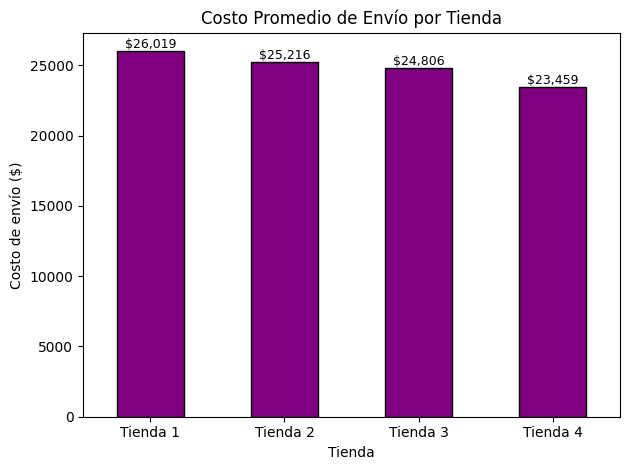

**Tienda 4** tiene el menor costo de envío promedio, lo que podría ser un factor competitivo, pero no compensa su bajo nivel de ingresos.

---

### **Conclusión**

A partir del análisis, se concluye que **la Tienda 4 es la que presenta el menor rendimiento global**, con el ingreso total más bajo entre todas las tiendas, una posición discreta en ventas de categorías clave y una valoración promedio que no la diferencia positivamente de las demás.
Si bien presenta el menor costo de envío, este factor no se traduce en un mejor desempeño comercial.

Por lo tanto, se recomienda **vender la Tienda 4** y reinvertir los recursos en un nuevo negocio que ofrezca mayor potencial de crecimiento y rentabilidad.